In [1]:
pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

Processing ./mlrose
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose_hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=132287 sha256=2db9b46211e3e70f99f7cd7858b40fd9f3cf514f5a780404ac3dc2701be7d5d1
  Stored in directory: /private/var/folders/c6/5zg6wy5n121f2pzclkwbzplm0000gn/T/pip-ephem-wheel-cache-16ya62yd/wheels/77/c5/de/7a63a2c78a12ad335a5091a9209439e12d86616744464a5ae4
Successfully built mlrose_hiive
  Attempting uninstall: mlrose_hiive
    Found existing installation: mlrose_hiive 2.2.4
    Uninstalling mlrose_hiive-2.2.4:
      Successfully uninstalled mlrose_hiive-2.2.4
Note: you may need to restart the kernel to use updated packages.


In [109]:
"""
# B.
def border_swap(problem, next_gen, child, schedule):
    if schedule is None:
        print("order is none.")
        return next_gen
    if len(next_gen) == 0:
        next_gen.append(child)
    else:
        for i in schedule:
            if schedule[i] == -1 and i < len(schedule) - 1:
                schedule[i-1], schedule[i+1] = schedule[i+1], schedule[i-1]
        temp_schedule = [i for i in schedule if i != -1]
        #if problem.eval_fitness(temp_schedule) > problem.eval_fitness(child):
        next_gen.append(temp_schedule)
    return next_gen
"""

'\n# B.\ndef border_swap(problem, next_gen, child, schedule):\n    if schedule is None:\n        print("order is none.")\n        return next_gen\n    if len(next_gen) == 0:\n        next_gen.append(child)\n    else:\n        for i in schedule:\n            if schedule[i] == -1 and i < len(schedule) - 1:\n                schedule[i-1], schedule[i+1] = schedule[i+1], schedule[i-1]\n        temp_schedule = [i for i in schedule if i != -1]\n        #if problem.eval_fitness(temp_schedule) > problem.eval_fitness(child):\n        next_gen.append(temp_schedule)\n    return next_gen\n'

In [2]:
import mlrose_hiive as mh

In [3]:
#help(mh.runners)

In [4]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [5]:
import pandas as pd
import utility as u
import importlib

In [6]:
class Task:
    def __init__(self, task_id, duration, deadline, profit):
        self.task_id = task_id
        self.duration = duration
        self.deadline = deadline
        self.profit = profit

In [7]:
size = 108
importlib.reload(u)
tasks = u.generate_random_tasks(size, 5, 80, 25)

In [8]:
# # Job Scheduling
problem_ffp = mh.JobSchedulingGenerator().generate(seed=0, size=size, tasks=tasks, break_time=1, work_limit=2)
#state = problem_ffp.get_state()

In [9]:
problem_ffp.length

108

In [10]:
problem_ffp.fitness

245.0

In [11]:
# GA runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GAJSRunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[40, 50, 60],
              mutation_rates=[0.07, 0.08]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [12]:
df_run_curves_ffp.shape

(11292, 7)

In [13]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.005228,274.0,0.0,40,0.07,2048
1,1,0.031928,368.0,2.0,40,0.07,2048
2,2,0.060989,368.0,3.0,40,0.07,2048
3,3,0.087457,368.0,4.0,40,0.07,2048
4,4,0.109159,368.0,5.0,40,0.07,2048


In [14]:
df_run_curves_ffp['Fitness'].max()

922.0

In [15]:
df_run_curves_ffp[df_run_curves_ffp.Fitness == df_run_curves_ffp['Fitness'].max()]

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
9276,1816,23.776018,922.0,1907.0,60,0.07,2048
9277,1817,23.797001,922.0,1908.0,60,0.07,2048
9278,1818,23.821385,922.0,1909.0,60,0.07,2048
9279,1819,23.839184,922.0,1910.0,60,0.07,2048
9280,1820,23.854577,922.0,1911.0,60,0.07,2048
...,...,...,...,...,...,...,...
11287,1778,23.247471,922.0,1868.0,60,0.08,2048
11288,1779,23.260020,922.0,1869.0,60,0.08,2048
11289,1780,23.273632,922.0,1870.0,60,0.08,2048
11290,1781,23.287153,922.0,1871.0,60,0.08,2048


In [16]:
# need to check Time and FEvals

In [17]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [18]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
9276,1816,23.776018,922.0,1907.0,60,0.07,2048
9277,1817,23.797001,922.0,1908.0,60,0.07,2048
9278,1818,23.821385,922.0,1909.0,60,0.07,2048
9279,1819,23.839184,922.0,1910.0,60,0.07,2048
9280,1820,23.854577,922.0,1911.0,60,0.07,2048
...,...,...,...,...,...,...,...
11287,1778,23.247471,922.0,1868.0,60,0.08,2048
11288,1779,23.260020,922.0,1869.0,60,0.08,2048
11289,1780,23.273632,922.0,1870.0,60,0.08,2048
11290,1781,23.287153,922.0,1871.0,60,0.08,2048


In [19]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,60,0.07,1907.0,1932.0,0.001975
1,60,0.08,1372.0,1532.0,16.992362


In [20]:
# tentatively, pick pop size = 60 and mutation_rate = 0.07, as the only choice

In [21]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.005228,274.0,0.0,40,0.07,2048
1,1,0.031928,368.0,2.0,40,0.07,2048
2,2,0.060989,368.0,3.0,40,0.07,2048
3,3,0.087457,368.0,4.0,40,0.07,2048
4,4,0.109159,368.0,5.0,40,0.07,2048


In [22]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [23]:
# GA runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GAJSRunner(problem=problem_ffp,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[60], # 20 bits in total
              mutation_rates=[0.07])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [24]:
df_iter_curves_ffp.shape

(19588, 7)

In [25]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.005904,274.0,0.0,60,0.07,2048
1,1,0.049360,374.0,2.0,60,0.07,2048
2,2,0.080509,374.0,3.0,60,0.07,2048
3,3,0.116294,392.0,5.0,60,0.07,2048
4,4,0.154327,392.0,6.0,60,0.07,2048


In [26]:
df_iter_curves_ffp.Fitness.max()

925.0

In [1]:
#df_iter_curves_ffp.to_csv('gab_mutate_js_108.csv')
import pandas as pd
df_iter_curves_ffp = pd.read_csv('../../csv-files/gab_mutate_js_108.csv')

In [28]:
df_iter_curves_ffp.Iteration.max()

2048

In [2]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [30]:
df_fitness_iter_ffp.shape

(2049, 3)

In [31]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,316.3,1212.011111
1,1,382.7,321.122222
2,2,391.2,252.844444
3,3,394.4,212.488889
4,4,398.8,290.177778


In [32]:
# convergence point
df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration

1679    1679
1680    1680
1681    1681
1682    1682
1683    1683
        ... 
1776    1776
1777    1777
1778    1778
1779    1779
1780    1780
Name: Iteration, Length: 871, dtype: int64

In [33]:
# converge point-never converged
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

nan

In [7]:
#import numpy as np
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [35]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,316.3,1212.011111,34.813950
1,1,382.7,321.122222,17.919883
2,2,391.2,252.844444,15.901083
3,3,394.4,212.488889,14.576999
4,4,398.8,290.177778,17.034605


Text(0, 0.5, 'Fitness')

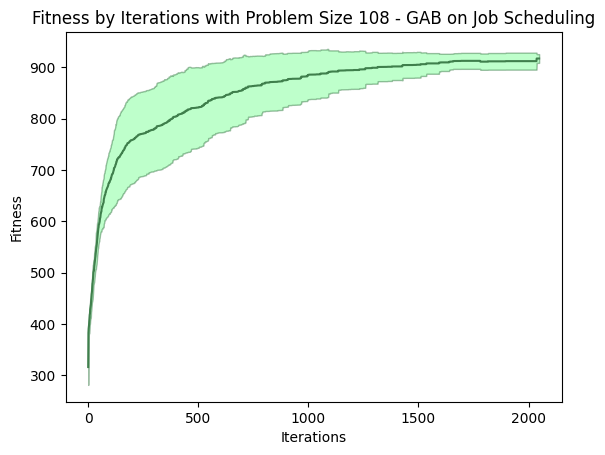

In [36]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#3F7F4C')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title(f'Fitness by Iterations with Problem Size {size} - GAB on Job Scheduling')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [4]:
# elbow analysis
from kneed import DataGenerator, KneeLocator
kneedle = KneeLocator(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, S=1.0, curve="concave", direction="increasing")

print(kneedle.knee)

141


In [8]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration'] == kneedle.knee]

,Iteration,avg_fitness,var_fitness,stddev_fitness
141,141,725.1,6685.433333,81.764499


In [37]:
df_fitness_iter_ffp.avg_fitness.max()

917.0

In [38]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()

86.118845530787

In [39]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp.stddev_fitness.max()].Iteration,

(346    346
 Name: Iteration, dtype: int64,)

In [40]:
# Fevals - iteration

In [2]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [3]:
df_FEvals_iter_ffp.avg_FEvals.max()

2146.5714285714284

In [42]:
df_FEvals_iter_ffp.shape

(2049, 3)

In [43]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,1.9,0.100000
2,2,3.4,0.488889
3,3,4.9,0.988889
4,4,6.3,1.788889


In [44]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [45]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 15.704109259013878)

In [46]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,1.9,0.100000,0.316228
2,2,3.4,0.488889,0.699206
3,3,4.9,0.988889,0.994429
4,4,6.3,1.788889,1.337494


Text(0, 0.5, 'FEvals')

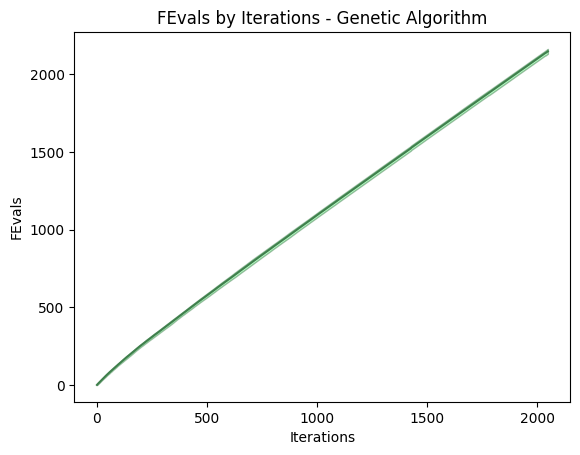

In [47]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#3F7F4C')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('FEvals by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [48]:
# fitness - wall clock time

In [49]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [50]:
df_time_iter_ffp.shape

(2049, 3)

In [51]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.003938,0.000003
1,1,0.030052,0.000764
2,2,0.049321,0.001277
3,3,0.067015,0.001479
4,4,0.083256,0.001897


In [52]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [53]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.003938,0.000003,0.001643
1,1,0.030052,0.000764,0.027642
2,2,0.049321,0.001277,0.035741
3,3,0.067015,0.001479,0.038454
4,4,0.083256,0.001897,0.043553


Text(0, 0.5, 'Time')

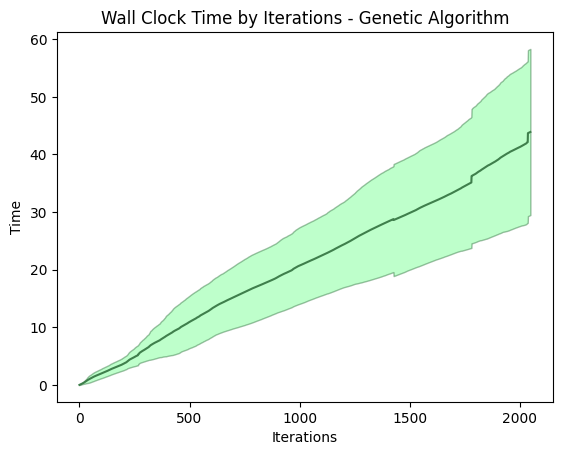

In [54]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#3F7F4C')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('Wall Clock Time by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [55]:
df_time_iter_ffp.stddev_time.max()

14.417785316425556

In [56]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time == df_time_iter_ffp.stddev_time.max()].Iteration

2048    2048
Name: Iteration, dtype: int64

In [57]:
df_time_iter_ffp.avg_time.max()

43.902593606293